# Data Wrangling Capstone Project 2

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [22]:
pwd

'C:\\Users\\Piyush\\Desktop\\Guided_Capstone-Springboard\\2Guided Capstone 2-Housing Pricing Prediction'

# Data Collection

In [23]:
# Load data from csv file
df = pd.read_csv('train.csv')

In [24]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
df.shape

(1460, 81)

In [26]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [27]:
# Data Types
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [28]:
# Description of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [29]:
# Count of Unique values
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [30]:
# Percentage of unique values
df.nunique()/df.size*100

Id               1.234568
MSSubClass       0.012684
MSZoning         0.004228
LotFrontage      0.093015
LotArea          0.907323
                   ...   
MoSold           0.010147
YrSold           0.004228
SaleType         0.007610
SaleCondition    0.005074
SalePrice        0.560629
Length: 81, dtype: float64

In [31]:
# Range of values per column
df.aggregate(['min','max'])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
min,1,20,C (all),21.0,1300,Grvl,IR1,Bnk,AllPub,Corner,...,0,0,0,0,0,1,2006,COD,Abnorml,34900
max,1460,190,RM,313.0,215245,Pave,Reg,Lvl,NoSeWa,Inside,...,552,508,480,738,15500,12,2010,WD,Partial,755000


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


<AxesSubplot:xlabel='SalePrice', ylabel='count'>

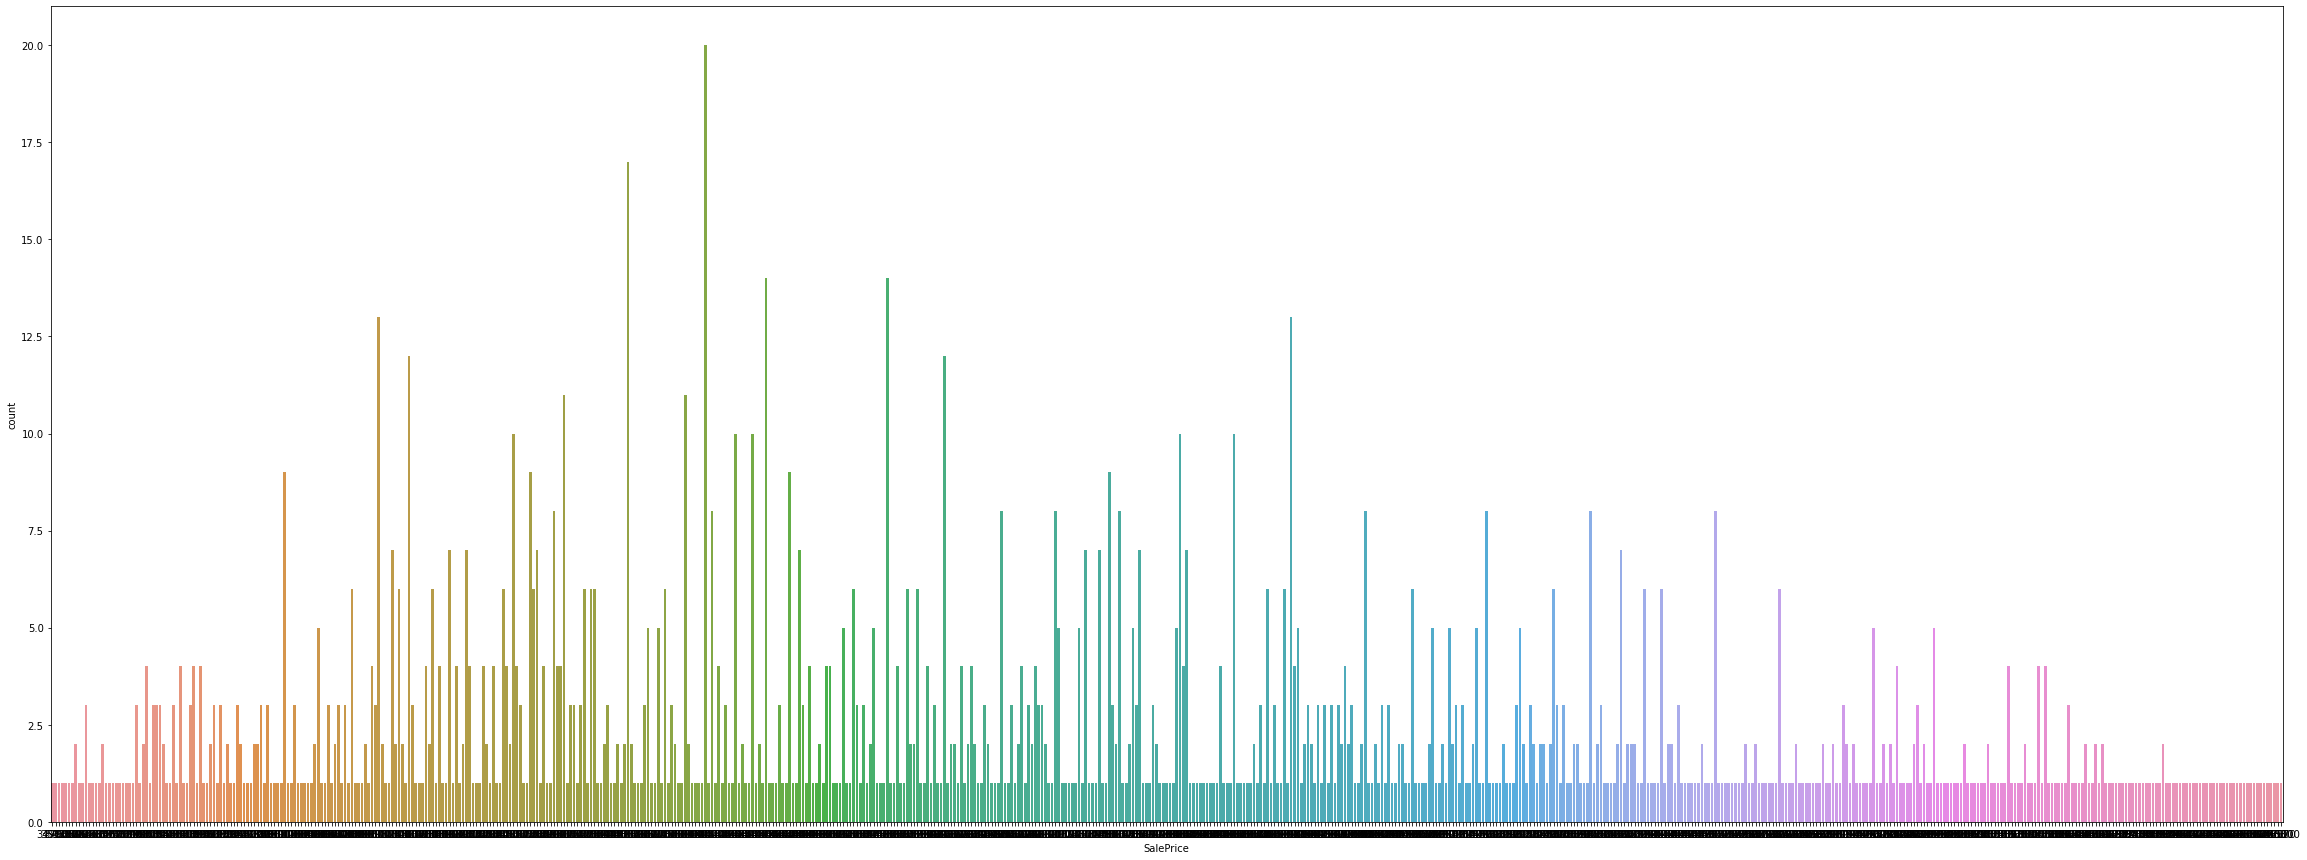

In [35]:
plt.figure(figsize=(40,15))
#plt.xticks(rotation='90')
sns.countplot(x='SalePrice', data=df)

# Data Cleaning

Handle mising and NA values

In [37]:
df.shape

(1460, 81)

In [38]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Text(0.5, 1.0, 'Percent missing data by feature')

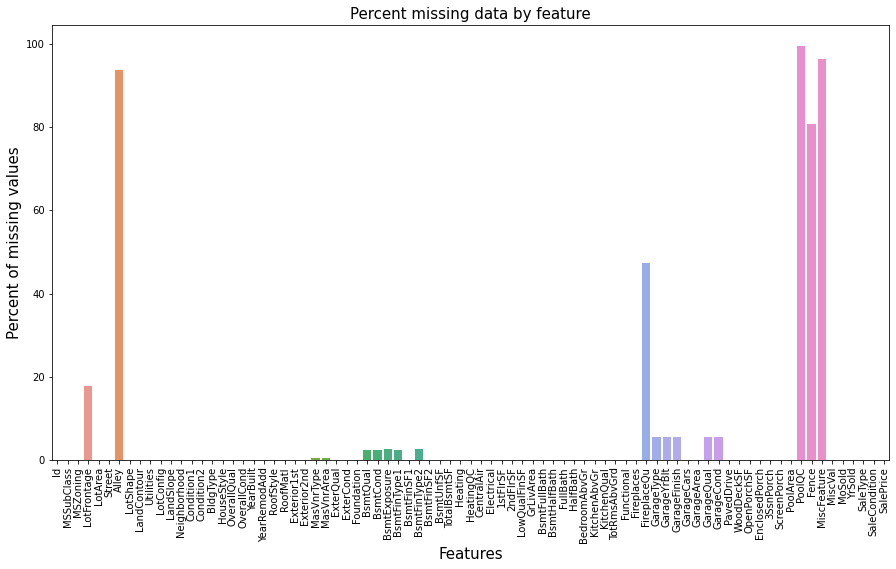

In [42]:
# percentage of missing data by features
df_percentage = (df.isnull().sum() / len(df)) * 100
f, ax = plt.subplots(figsize=(15, 8))
plt.xticks(rotation='90')
sns.barplot(x=df_percentage.index, y=df_percentage)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

<AxesSubplot:>

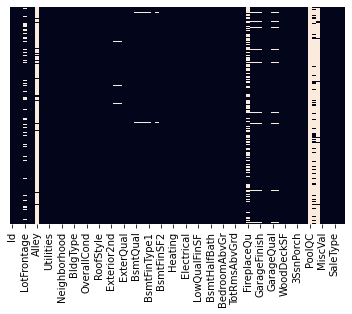

In [43]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [44]:
# List of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

# Visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [45]:
nas=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
FireplaceQu,0.472603
LotFrontage,0.177397
GarageYrBlt,0.055479
GarageCond,0.055479
GarageType,0.055479
GarageFinish,0.055479


In [46]:
# 'PoolQC', 'MiscFeature', 'Alley', 'Fence' features have the missing values more than 80 percent 
# its better to drop these columns
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'],axis=1,inplace=True)

In [47]:
df.shape

(1460, 77)

In [48]:
# Fill missing values of remaining features one at a time
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [50]:
df['FireplaceQu']

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object

In [51]:
# Since 'FireplaceQu' is a categorical variable, replace all missing values are 
# replaced by most frequently occuring category (mode)
df['FireplaceQu'].fillna((df['FireplaceQu'].mode()[0]), inplace=True)

In [52]:
df['FireplaceQu']

0       Gd
1       TA
2       TA
3       Gd
4       TA
        ..
1455    TA
1456    TA
1457    Gd
1458    Gd
1459    Gd
Name: FireplaceQu, Length: 1460, dtype: object

In [54]:
# Replace missing values of 'LotFrontage' variable with its mean value
df['LotFrontage'].fillna((df['LotFrontage'].mean()), inplace=True)

In [55]:
df['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [56]:
# 'GarageYrBlt' feature is not required we are dropping it
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [57]:
# Since 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1',
# 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical', are categorical features, 
# we are replacing their missing values with mode values of corresponding features
df['GarageCond'].fillna((df['GarageCond'].mode()[0]), inplace=True)

In [58]:
df['GarageType'].fillna((df['GarageType'].mode()[0]), inplace=True)

In [59]:
df['GarageFinish'].fillna((df['GarageFinish'].mode()[0]), inplace=True)

In [60]:
df['GarageQual'].fillna((df['GarageQual'].mode()[0]), inplace=True)

In [61]:
df['BsmtExposure'].fillna((df['BsmtExposure'].mode()[0]), inplace=True)

In [62]:
df['BsmtFinType2'].fillna((df['BsmtFinType2'].mode()[0]), inplace=True)

In [63]:
df['BsmtFinType1'].fillna((df['BsmtFinType1'].mode()[0]), inplace=True)

In [64]:
df['BsmtCond'].fillna((df['BsmtCond'].mode()[0]), inplace=True)

In [65]:
df['BsmtQual'].fillna((df['BsmtQual'].mode()[0]), inplace=True)

In [66]:
df['MasVnrType'].fillna((df['MasVnrType'].mode()[0]), inplace=True)

In [67]:
df['Electrical'].fillna((df['Electrical'].mode()[0]), inplace=True)

In [68]:
# Replacing missing values for the feature 'MasVnrArea' with its mean since it is float value
df['MasVnrArea'].fillna((df['MasVnrArea'].mean()), inplace=True)

In [69]:
# Check for duplicated rows
duplicateRowsDF=df[df.duplicated()]
duplicateRowsDF

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [70]:
df.shape

(1460, 76)

<AxesSubplot:>

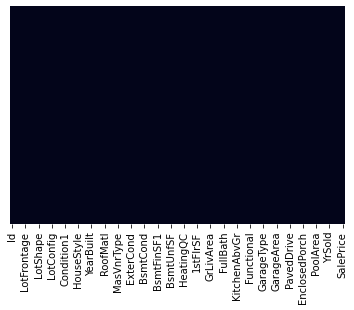

In [71]:
# Checking the heat map after handling the Null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [73]:
df.to_csv('Capstone_2-Wrangled.csv')